In [181]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

In [182]:
RUTA_ARCHIVO = '../data/pruebas.csv'

In [183]:
data = pd.read_csv(RUTA_ARCHIVO)

In [184]:
# pruebas
data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
data = data.dropna()
data.head()

,compania,nombre_tarifa,tipo_tarifa,potencia_contratada,precio_€/kWh,precio_llano,precio_punta,precio_valle,permanencia
0,Repsol,Ahorro Plus,fija,3.95,0.119746,0.068219,0.068219,0.068219,No
2,Repsol,Mis 10h con Descuento,fija,≤15,0.068219,0.068219,0.068219,0.068219,Sí
3,Repsol,2ª Residencia,fija,≤15,0.054521,0.054521,0.054521,0.054521,Sí
4,Repsol,Mis 3 Horas Gratis,fija,≤15,0.068219,0.068219,0.068219,0.068219,Sí
5,Repsol,Domingos Gratis,fija,≤15,0.068219,0.068219,0.068219,0.068219,Sí


In [185]:
# Preparacion de los datos
# Convertir la columna 'permanencia' a numérica (0 para "no", 1 para "si")
X = data.copy()
X['permanencia'] = X['permanencia'].map({'No': 0, 'Sí': 1})

# Convertir la columna 'tipo_tarifa' a numérica utilizando One-Hot Encoding
X = pd.get_dummies(X, columns=['tipo_tarifa'], drop_first=True)
X = pd.get_dummies(X, columns=['potencia_contratada'], drop_first=True)

In [186]:
X.head(1)

,compania,nombre_tarifa,precio_€/kWh,precio_llano,precio_punta,precio_valle,permanencia,tipo_tarifa_variable,potencia_contratada_4.47,potencia_contratada_>15,potencia_contratada_Entre 10 y 15,potencia_contratada_≤10,potencia_contratada_≤15
0,Repsol,Ahorro Plus,0.119746,0.068219,0.068219,0.068219,0,False,False,False,False,False,False


In [187]:
# Metemos todo menos los nombres
features = X.drop(columns=['compania', 'nombre_tarifa'])
# features = X[['potencia_contratada', 'precio_€/kWh', 'precio_llano', 'precio_punta', 'precio_valle', 'permanencia', 'tipo_tarifa_variable']]

In [188]:
# Escalamos los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [189]:
# Definir el número de clusters
n_clusters = 2  # Puedes ajustar este número

# Crear el modelo de K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(features_scaled)

# Obtener los clusters a los que pertenece cada punto de datos
X['cluster'] = kmeans.labels_

In [190]:
# Calcular la inercia
print(f'Inercia: {kmeans.inertia_}')

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f'Índice de Silhouette: {silhouette_avg}')


Inercia: 375.54621702244555
Índice de Silhouette: 0.2641829758204443


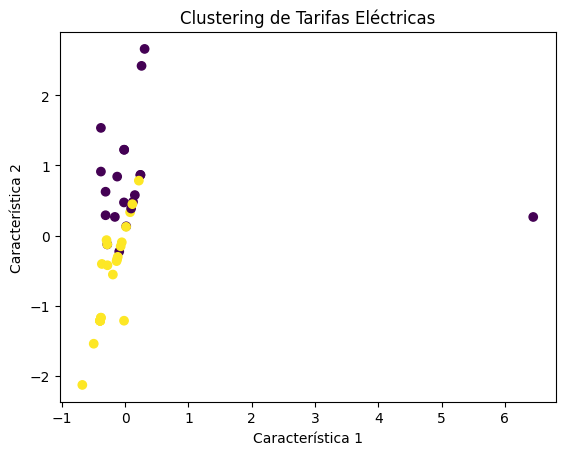

In [191]:
# Visualizar los clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=X['cluster'], cmap='viridis')
plt.title('Clustering de Tarifas Eléctricas')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [192]:
# Primero, asegúrate de que solo trabajas con columnas numéricas
numerical_columns = X.select_dtypes(include=['number']).columns

# Agrupar por 'cluster' y calcular la media solo de las columnas numéricas
cluster_summary = X.groupby('cluster')[numerical_columns].mean()

# Mostrar el resumen de los clusters
print(cluster_summary)

         precio_€/kWh  precio_llano  precio_punta  precio_valle  permanencia  \
cluster                                                                        
0            0.161526      0.151648      0.174558      0.130017          0.3   
1            0.090383      0.092770      0.100493      0.088322          0.4   

         cluster  
cluster           
0            0.0  
1            1.0  


In [193]:
X.head(1)

,compania,nombre_tarifa,precio_€/kWh,precio_llano,precio_punta,precio_valle,permanencia,tipo_tarifa_variable,potencia_contratada_4.47,potencia_contratada_>15,potencia_contratada_Entre 10 y 15,potencia_contratada_≤10,potencia_contratada_≤15,cluster
0,Repsol,Ahorro Plus,0.119746,0.068219,0.068219,0.068219,0,False,False,False,False,False,False,1


In [194]:
# Clasificamos un nuevo dato
nuevo_dato = np.array([[0.119746, 0.068219, 0.068219, 0.068219, 0, False, False, False, False, False, False]])
nuevo_dato_scaled = scaler.transform(nuevo_dato)
cluster_asignado = kmeans.predict(nuevo_dato_scaled)

print(f"El nuevo dato se clasifica en el cluster: {cluster_asignado[0]}")

El nuevo dato se clasifica en el cluster: 1


c:\Users\pabma\OneDrive\Escritorio\CONQUER\DATA_SCIENCE\repo\proyecto_tripulaciones\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [195]:
# Una vez hemos clasificado un nuevo dato con el kmeans y tenemos su cluster, vamos a mostrar todos las filas de la db que tengan el mismo 
# cluster que el nuevo dato

datos_clasificados = X[X['cluster'] == cluster_asignado[0]]
datos_clasificados.head()

,compania,nombre_tarifa,precio_€/kWh,precio_llano,precio_punta,precio_valle,permanencia,tipo_tarifa_variable,potencia_contratada_4.47,potencia_contratada_>15,potencia_contratada_Entre 10 y 15,potencia_contratada_≤10,potencia_contratada_≤15,cluster
0,Repsol,Ahorro Plus,0.119746,0.068219,0.068219,0.068219,0,False,False,False,False,False,False,1
2,Repsol,Mis 10h con Descuento,0.068219,0.068219,0.068219,0.068219,1,False,False,False,False,False,True,1
3,Repsol,2ª Residencia,0.054521,0.054521,0.054521,0.054521,1,False,False,False,False,False,True,1
4,Repsol,Mis 3 Horas Gratis,0.068219,0.068219,0.068219,0.068219,1,False,False,False,False,False,True,1
5,Repsol,Domingos Gratis,0.068219,0.068219,0.068219,0.068219,1,False,False,False,False,False,True,1


In [196]:
# Revertimos los valores del dummies y los del OneHotEncoder a sus valores originales para interpretar los resultados

datos_clasificados['tipo_tarifa'] = datos_clasificados['tipo_tarifa_variable'].map({0: 'fija', 1: 'variable'})
datos_clasificados = datos_clasificados.drop(columns=['tipo_tarifa_variable'])

mapeo_potencia = {
    'potencia_contratada_4.47': '4.47',
    'potencia_contratada_>15': '>15',
    'potencia_contratada_Entre 10 y 15': 'Entre 10 y 15',
    'potencia_contratada_≤10': '≤10',
    'potencia_contratada_≤15': '≤15',
}

# Seleccionar las columnas dummy que quieres revertir
columnas_dummies = ['potencia_contratada_4.47', 'potencia_contratada_>15', 'potencia_contratada_Entre 10 y 15',
                    'potencia_contratada_≤10', 'potencia_contratada_≤15']

# Crear una nueva columna con el valor revertido
datos_clasificados['potencia_contratada'] = datos_clasificados[columnas_dummies].idxmax(axis=1).map(mapeo_potencia)

# Eliminar las columnas dummy si ya no son necesarias
datos_clasificados = datos_clasificados.drop(columns=columnas_dummies)

C:\Users\pabma\AppData\Local\Temp\ipykernel_44788\2401223302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clasificados['tipo_tarifa'] = datos_clasificados['tipo_tarifa_variable'].map({0: 'fija', 1: 'variable'})


In [200]:
print(len(datos_clasificados))
datos_clasificados # Aqui ahora deberiamos hacer un filtro de cuales queremos mostrar al usuario para mejorar su tarifa

25


,compania,nombre_tarifa,precio_€/kWh,precio_llano,precio_punta,precio_valle,permanencia,cluster,tipo_tarifa,potencia_contratada
0,Repsol,Ahorro Plus,0.119746,0.068219,0.068219,0.068219,0,1,NaN,4.47
2,Repsol,Mis 10h con Descuento,0.068219,0.068219,0.068219,0.068219,1,1,NaN,≤15
3,Repsol,2ª Residencia,0.054521,0.054521,0.054521,0.054521,1,1,NaN,≤15
4,Repsol,Mis 3 Horas Gratis,0.068219,0.068219,0.068219,0.068219,1,1,NaN,≤15
5,Repsol,Domingos Gratis,0.068219,0.068219,0.068219,0.068219,1,1,NaN,≤15
6,Repsol,Descuento Mañana y Tarde,0.068219,0.068219,0.068219,0.068219,1,1,NaN,≤15
7,Repsol,Descuento Día,0.068219,0.068219,0.068219,0.068219,1,1,NaN,≤15
9,Repsol,Teletrabajo,0.068219,0.068219,0.068219,0.068219,1,1,NaN,≤15
10,TotalEnergies,A Tu Aire Luz Siempre,0.104995,0.104995,0.104995,0.104995,0,1,NaN,≤15
11,TotalEnergies,Plan Ahora,0.030000,0.030000,0.030000,0.030000,0,1,NaN,≤15
